# Assignment 3: CNN

#### Student Name: 

In this assignment, you will create a CNN model to classifiy the images in the CIFAR-10 dataset (https://www.cs.toronto.edu/~kriz/cifar.html). It consists of 60,000 32x32 color images containing one of 10 object classes, (6000 images per class).


## Load the data

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# load train and test dataset
(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.cifar10.load_data()

# normalize to range 0-1
train_X = train_X / 255.0
test_X = test_X / 255.0

# Convert labels to one-hot encoded vectors
num_classes = 10
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes)


170498071/170498071 [==============================] - 6s 0us/step


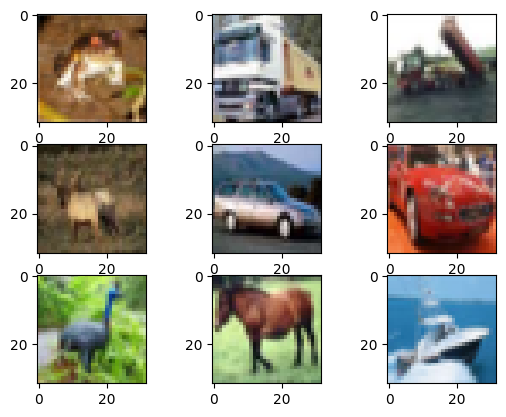

In [2]:
# plot first few images
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(train_X[i])
# show the figure
plt.show()

## Train CNN Model

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=20, batch_size=64, validation_data=(test_X, test_Y))


Epoch 1/20
782/782 [==============================] - 113s 138ms/step - loss: 1.6505 - accuracy: 0.3877 - val_loss: 1.3426 - val_accuracy: 0.5063
Epoch 2/20
782/782 [==============================] - 105s 135ms/step - loss: 1.2539 - accuracy: 0.5514 - val_loss: 1.1389 - val_accuracy: 0.5960
Epoch 3/20
782/782 [==============================] - 106s 136ms/step - loss: 1.1163 - accuracy: 0.6089 - val_loss: 1.0374 - val_accuracy: 0.6260
Epoch 4/20
782/782 [==============================] - 103s 132ms/step - loss: 1.0216 - accuracy: 0.6388 - val_loss: 0.9645 - val_accuracy: 0.6697
Epoch 5/20
782/782 [==============================] - 105s 134ms/step - loss: 0.9433 - accuracy: 0.6700 - val_loss: 0.9604 - val_accuracy: 0.6696
Epoch 6/20
782/782 [==============================] - 104s 133ms/step - loss: 0.8839 - accuracy: 0.6906 - val_loss: 0.8451 - val_accuracy: 0.7038
Epoch 7/20
782/782 [==============================] - 101s 129ms/step - loss: 0.8375 - accuracy: 0.7050 - val_loss: 0.8457 -

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

## Evaluate the Model

313/313 - 5s - loss: 0.7747 - accuracy: 0.7419 - 5s/epoch - 16ms/step


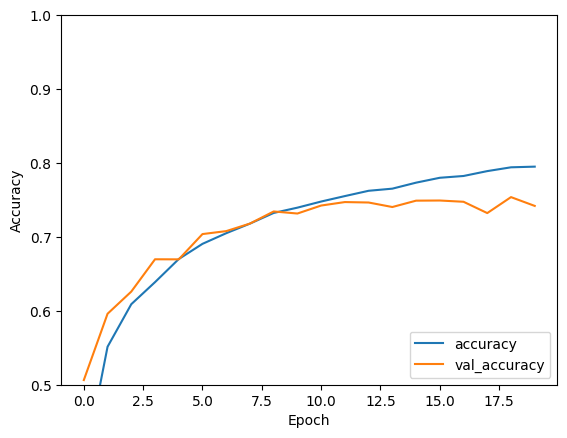

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_X,  test_Y, verbose=2)

Though accuracy levels are slightly lower at 80%, Model training and validation accuracies are very close until epoch 10. After that drift is evident. Batch normalization can be explored to further improve the accuracy and early results show some improvement but mixed results when it comes to validation accuracy.

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=10, batch_size=64, validation_data=(test_X, test_Y))



Epoch 1/10
782/782 [==============================] - 93s 117ms/step - loss: 1.4246 - accuracy: 0.4866 - val_loss: 1.2395 - val_accuracy: 0.5592
Epoch 2/10
782/782 [==============================] - 91s 116ms/step - loss: 1.0799 - accuracy: 0.6213 - val_loss: 1.1944 - val_accuracy: 0.5739
Epoch 3/10
782/782 [==============================] - 90s 115ms/step - loss: 0.9737 - accuracy: 0.6579 - val_loss: 1.2324 - val_accuracy: 0.5806
Epoch 4/10
782/782 [==============================] - 90s 115ms/step - loss: 0.9014 - accuracy: 0.6852 - val_loss: 1.0552 - val_accuracy: 0.6334
Epoch 5/10
782/782 [==============================] - 88s 113ms/step - loss: 0.8566 - accuracy: 0.7017 - val_loss: 0.9357 - val_accuracy: 0.6756
Epoch 6/10
782/782 [==============================] - 92s 117ms/step - loss: 0.8164 - accuracy: 0.7153 - val_loss: 0.9307 - val_accuracy: 0.6758
Epoch 7/10
782/782 [==============================] - 93s 118ms/step - loss: 0.7845 - accuracy: 0.7236 - val_loss: 0.8463 - val_ac

313/313 - 4s - loss: 0.9316 - accuracy: 0.6841 - 4s/epoch - 12ms/step


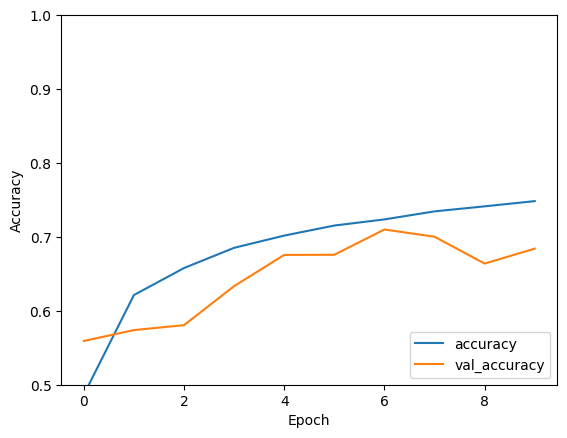

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_X,  test_Y, verbose=2)